In [148]:
# Impüorts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Intersection 
- Run the snakemake pipeline

## Comments
- Might need to merge Annagram files before
- Same for graph.bed 
- You are also able to run 

In [149]:
# Intersection file 
f = "../results/SV/intersection_anna_graph.10000000000.bed"

In [150]:
# Read with pandas
df = pd.read_csv(f, sep = "\t")

In [151]:
# Check this
df

,chrom,start,end,num,list,graph,annagram
0,10002#1#Chr1,1,2601,1,annagram,0,1
1,10002#1#Chr1,2601,3197,2,"graph,annagram",1,1
2,10002#1#Chr1,3197,3500,1,annagram,0,1
3,10002#1#Chr1,3500,3520,2,"graph,annagram",1,1
4,10002#1#Chr1,3520,4354,1,annagram,0,1
...,...,...,...,...,...,...,...
4244497,TAIR10#1#Chr5,26972635,26972645,1,annagram,0,1
4244498,TAIR10#1#Chr5,26973227,26973255,2,"graph,annagram",1,1
4244499,TAIR10#1#Chr5,26973255,26973256,1,annagram,0,1
4244500,TAIR10#1#Chr5,26974269,26974300,2,"graph,annagram",1,1


In [152]:
# Add two columns
df["acc"] = df["chrom"].apply(lambda x: x.split("#")[0])
df["length"] = df["end"] - df["start"]

In [153]:
df

,chrom,start,end,num,list,graph,annagram,acc,length
0,10002#1#Chr1,1,2601,1,annagram,0,1,10002,2600
1,10002#1#Chr1,2601,3197,2,"graph,annagram",1,1,10002,596
2,10002#1#Chr1,3197,3500,1,annagram,0,1,10002,303
3,10002#1#Chr1,3500,3520,2,"graph,annagram",1,1,10002,20
4,10002#1#Chr1,3520,4354,1,annagram,0,1,10002,834
...,...,...,...,...,...,...,...,...,...
4244497,TAIR10#1#Chr5,26972635,26972645,1,annagram,0,1,TAIR10,10
4244498,TAIR10#1#Chr5,26973227,26973255,2,"graph,annagram",1,1,TAIR10,28
4244499,TAIR10#1#Chr5,26973255,26973256,1,annagram,0,1,TAIR10,1
4244500,TAIR10#1#Chr5,26974269,26974300,2,"graph,annagram",1,1,TAIR10,31


In [154]:
def read_data(f): 
    df = pd.read_csv(f, sep = "\t")
    # Add two columns
    df["acc"] = df["chrom"].apply(lambda x: x.split("#")[0])
    df["length"] = df["end"] - df["start"]
    do = df.groupby("list").sum()["length"]/sum(df.groupby("list").sum()["length"])
    return do

In [155]:
pref = "../results/SV/intersection_anna_graph."

In [156]:
data = []
for x in [10000000000,10000, 20000, 50000, 100000]: 
    xx = str(x)
    data.append(read_data(pref + xx + ".bed"))

In [157]:
data

[list
 annagram          0.003458
 graph             0.602984
 graph,annagram    0.393557
 Name: length, dtype: float64,
 list
 annagram          0.236339
 graph             0.326633
 graph,annagram    0.437028
 Name: length, dtype: float64,
 list
 annagram          0.148355
 graph             0.349400
 graph,annagram    0.502245
 Name: length, dtype: float64,
 list
 annagram          0.094905
 graph             0.376725
 graph,annagram    0.528369
 Name: length, dtype: float64,
 list
 annagram          0.076263
 graph             0.395181
 graph,annagram    0.528557
 Name: length, dtype: float64]

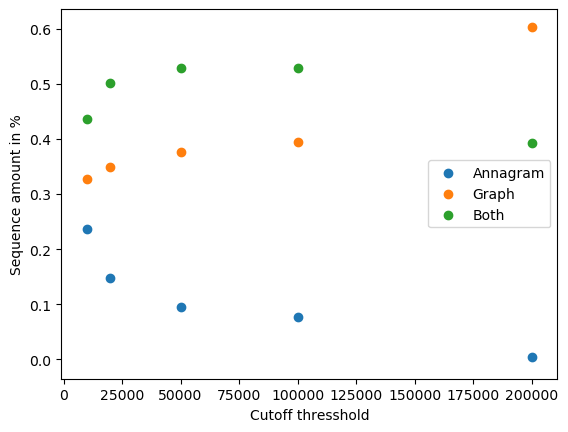

In [158]:
plt.rcdefaults() 
plt.scatter([200000,10000, 20000, 50000, 100000], [x["annagram"] for x in data], label = "Annagram")
plt.scatter([200000,10000, 20000, 50000, 100000], [x["graph"] for x in data], label = "Graph")
plt.scatter([200000,10000, 20000, 50000, 100000], [x["graph,annagram"] for x in data], label = "Both")
plt.ylabel("Sequence amount in %")
plt.xlabel("Cutoff thresshold")
plt.legend()
plt.savefig("plots/remove.bigbubble.png")
plt.savefig("plots/remove.bigbubble.svg")



In [159]:
plt.rcdefaults() 

In [160]:
data[0]

list
annagram          0.003458
graph             0.602984
graph,annagram    0.393557
Name: length, dtype: float64

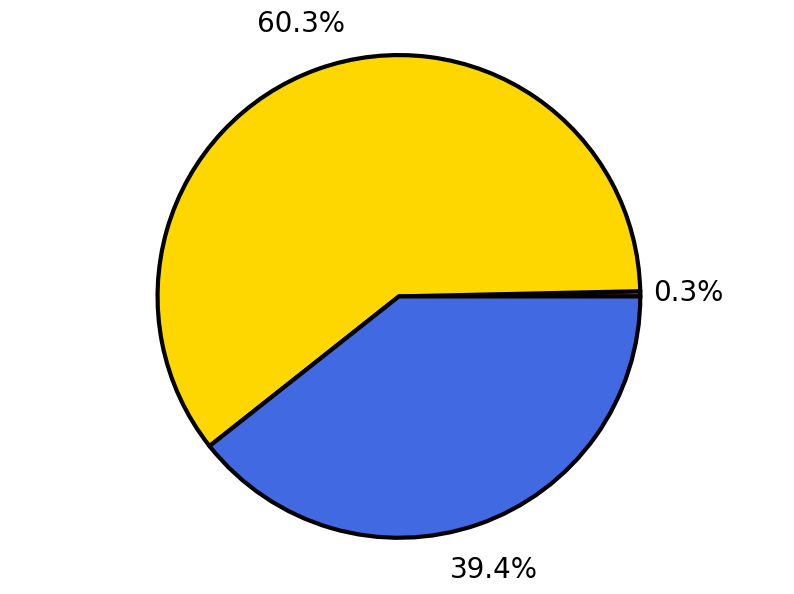

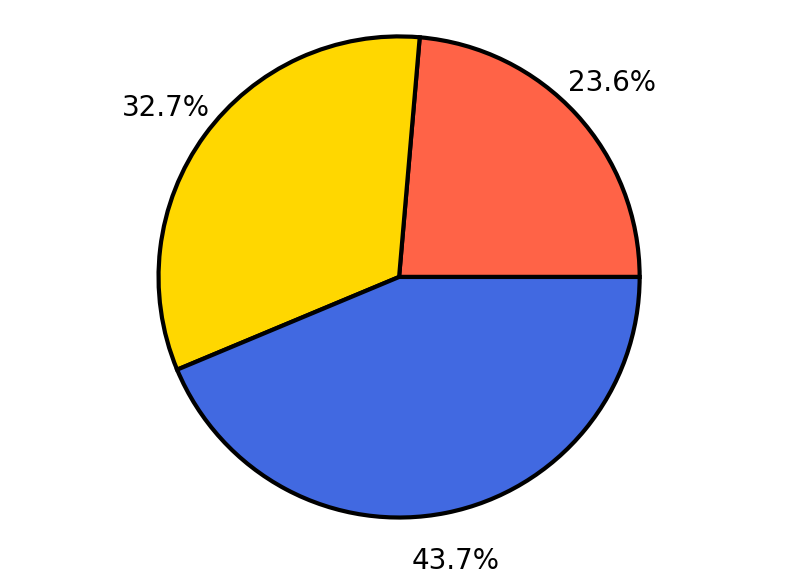

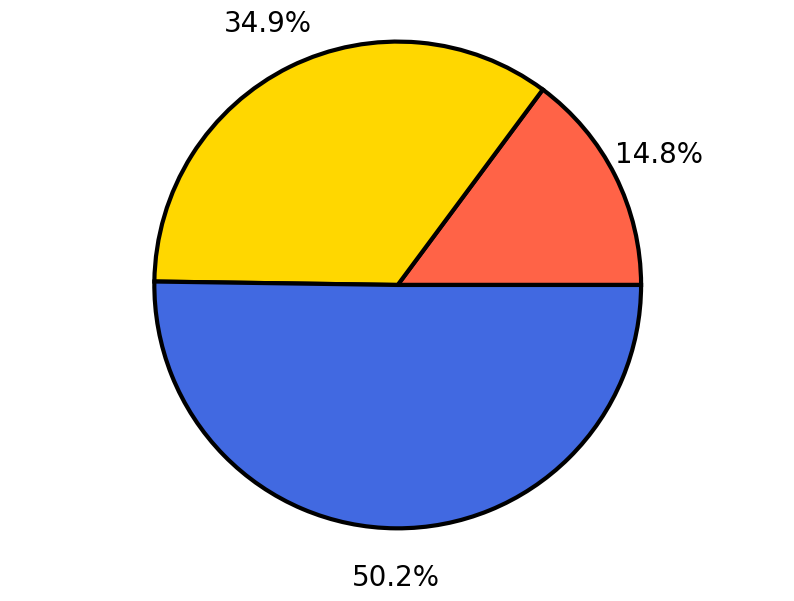

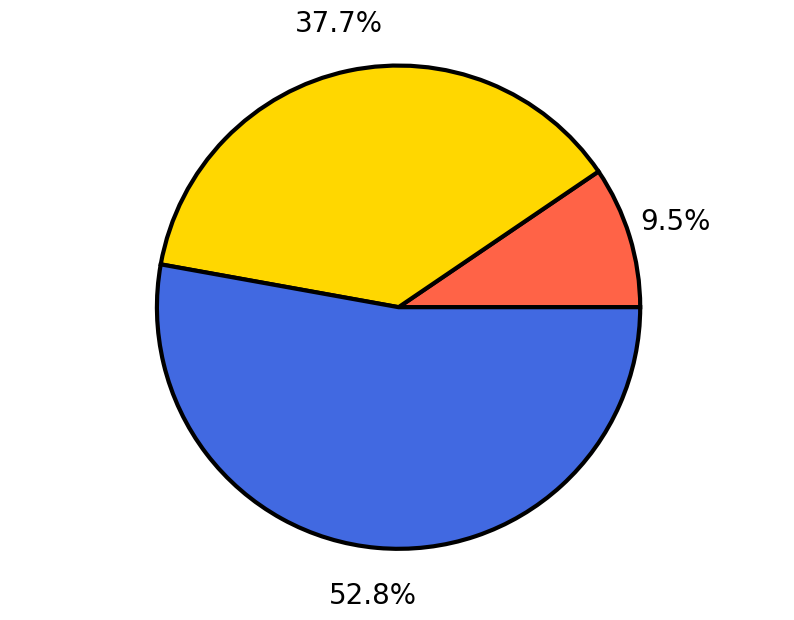

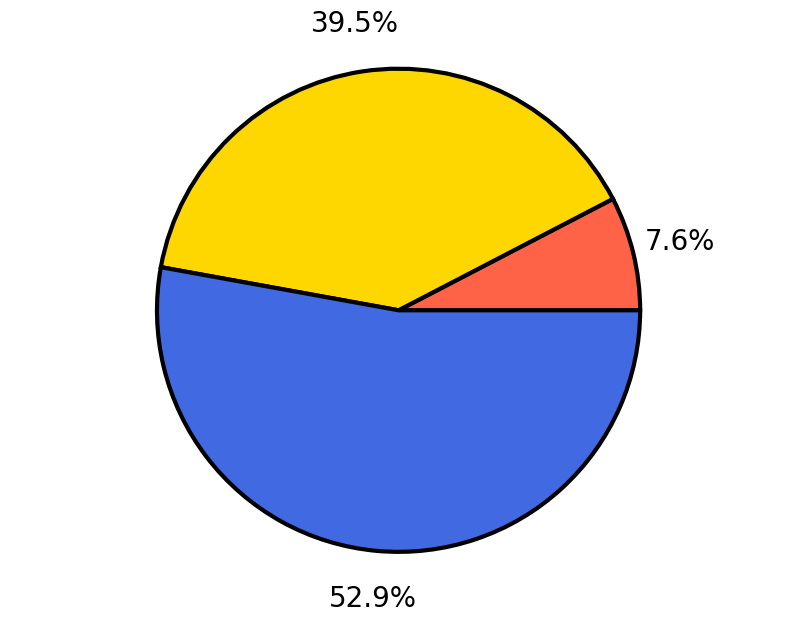

In [161]:
for i, x in enumerate(data):
    plt.figure(figsize=(10,7))
    plt.rcParams['font.size'] = 20
    labels = ['Soft', 'Private', 'Core']
    colors = ['tomato', 'gold', "royalblue"]
    plt.pie(x, colors=colors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 3, 'antialiased': True}, pctdistance=1.2)
    plt.axis('equal'); 
    plt.savefig("plots/pie.overlap."+ str([0,10000, 20000, 50000, 100000][i]) + ".png", dpi = 1000)
    plt.show()
    #plt.title("Cake chart - 26 accessions - Sequence based - Graph")

In [168]:
plt.rcParams['font.size'] = 10


# Analysis

In [169]:
# Take an example accession
df_1741 = df.loc[df["acc"] == "1741"]
df_1741

,chrom,start,end,num,list,graph,annagram,acc,length
454551,1741#1#Chr1,1,607,1,annagram,0,1,1741,606
454552,1741#1#Chr1,607,1208,2,"graph,annagram",1,1,1741,601
454553,1741#1#Chr1,1208,1511,1,annagram,0,1,1741,303
454554,1741#1#Chr1,1511,1531,2,"graph,annagram",1,1,1741,20
454555,1741#1#Chr1,1531,2365,1,annagram,0,1,1741,834
...,...,...,...,...,...,...,...,...,...
606442,1741#1#Chr5,27070187,27070188,1,annagram,0,1,1741,1
606443,1741#1#Chr5,27071201,27071232,2,"graph,annagram",1,1,1741,31
606444,1741#1#Chr5,27071232,27071233,1,annagram,0,1,1741,1
606445,1741#1#Chr5,27074367,27074389,1,graph,1,0,1741,22


In [170]:
# Check the total amount
absolute = df_1741.groupby("list").sum()["length"]
absolute

list
annagram            170784
graph             33034300
graph,annagram    21878228
Name: length, dtype: int64

In [171]:
ratio = df_1741.groupby("list").sum()["length"]/sum(df_1741.groupby("list").sum()["length"])
ratio

list
annagram          0.003100
graph             0.599715
graph,annagram    0.397184
Name: length, dtype: float64

/ebio/abt6/svorbrugg/svorbrugg/tools/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


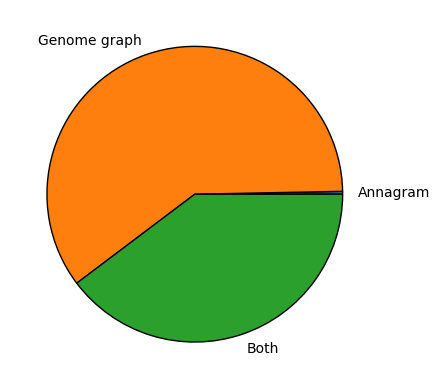

In [172]:
# This is a pie chart of the overlap
labels = ['Annagram', 'Genome graph', 'Both']
sizes = [df_1741.groupby("list").sum()["length"]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,         wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1});
#plt.savefig("piechart_overlap.before.png", dpi = 1000)

# Check whats wrong

In [177]:
# Intersection file 
f = "../results/SV/intersection_anna_graph.100000.bed"

In [178]:
# Read with pandas
df_new = pd.read_csv(f, sep = "\t")

In [180]:
# Get a list of all positions which are only covered by the "graph"
# Take a single chromosome of a specific accession
df_new1 = df_new.loc[df_new["chrom"] == "1741#1#Chr1"]
all1 = []
for k, x in df_new1.iterrows(): 
    all1.extend(list(range(x["start"], x["end"])))

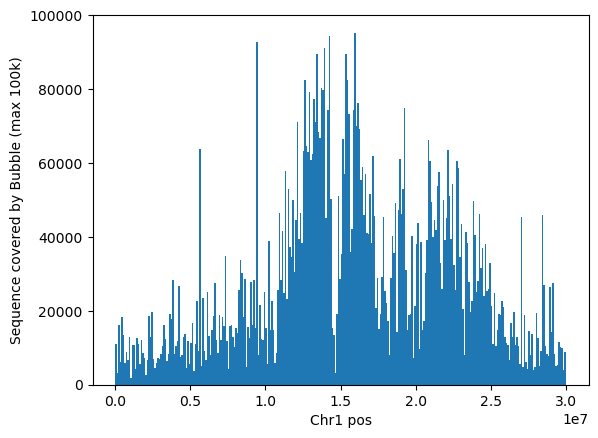

In [181]:
# Check on which position there are the most "graph sequences"
plt.hist(list(set(all1)), bins = np.linspace(0,30000000, 301));
plt.xlabel("Chr1 pos")
plt.ylabel("Sequence covered by Bubble (max 100k)")
plt.savefig("onlygraph.png")

In [182]:
# Take df_new single chromosome of a specific accession
df_new1 = df_new.loc[df_new["chrom"] == "1741#1#Chr1"].loc[df_new["list"] == "graph"]
# Get a list of all positions which are only covered by the "graph"
graph_all = []
for k, x in df_new1.iterrows(): 
    graph_all.extend(list(range(x["start"], x["end"])))

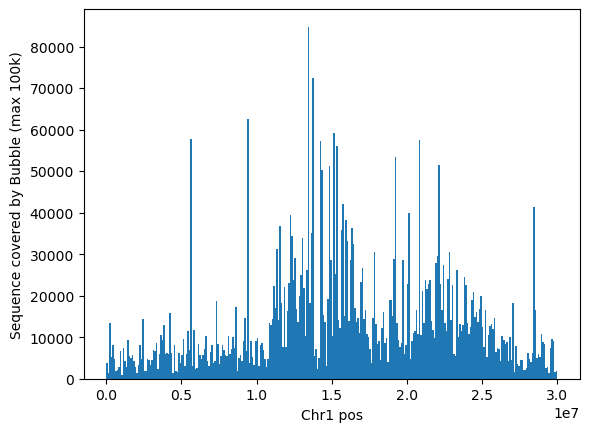

In [183]:
# Check on which position there are the most "graph sequences"
plt.hist(list(set(graph_all)), bins = np.linspace(0,30000000, 301));
plt.xlabel("Chr1 pos")
plt.ylabel("Sequence covered by Bubble (max 100k)")
plt.savefig("onlygraph.png")

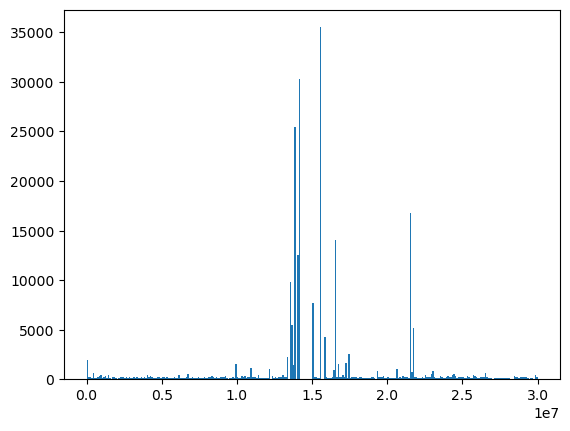

In [184]:
df_new1 = df_new.loc[df_new["chrom"] == "1741#1#Chr1"].loc[df_new["list"] == "annagram"]
# Get a list of all positions which are only covered by the "graph"
anna_all = []
for k, x in df_new1.iterrows(): 
    anna_all.extend(list(range(x["start"], x["end"])))
# Check on which position there are the most "graph sequences"
plt.hist(list(set(anna_all)), bins = np.linspace(0,30000000, 301));


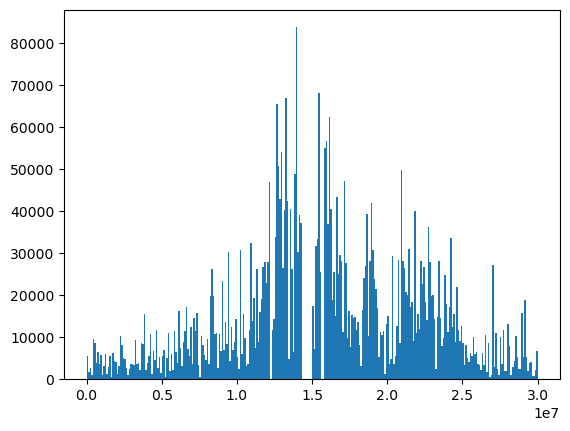

In [185]:
df_new1 = df_new.loc[df_new["chrom"] == "1741#1#Chr1"].loc[df_new["list"] == "graph,annagram"]
# Get a list of all positions which are only covered by the "graph"
ganna = []
for k, x in df_new1.iterrows(): 
    ganna.extend(list(range(x["start"], x["end"])))
# Check on which position there are the most "graph sequences"
plt.hist(list(set(ganna)), bins = np.linspace(0,30000000, 301));

In [186]:
data = []
df_cen = pd.read_csv("/tmp/global2/svorbrugg/1001GP/scripts/github/raw_data/centromere/centromeres.txt", sep = "\t")
        

In [187]:
centro_1741_chr1 = (list(range(df_cen.loc["1741"]["cen.start.1"] , df_cen.loc["1741"]["cen.end.1"])))

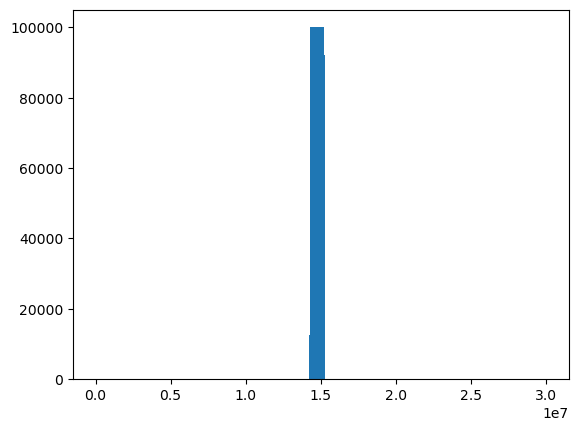

In [188]:
# Check on which position there are the most "graph sequences"
plt.hist(centro_1741_chr1, bins = np.linspace(0,30000000, 301));

In [189]:
removed_chr = list(set(graph_all) - set(jo1741_1))

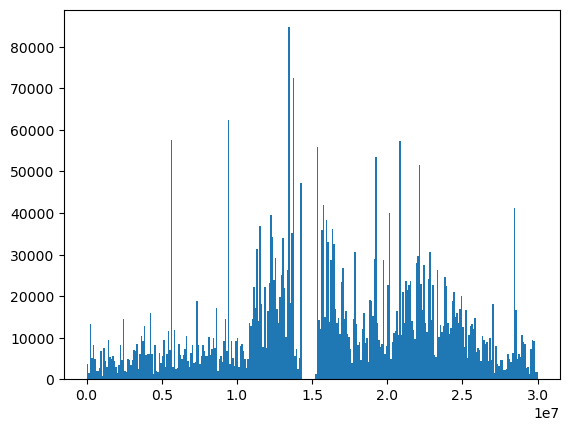

In [190]:
# Check on which position there are the most "graph sequences"
plt.hist(removed_chr, bins = np.linspace(0,30000000, 301));